<a href="https://colab.research.google.com/github/sibyjackgrove/SolarPV-DER-simulation-utility/blob/master/examples/PV-DER_usage_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and usage

## Installation from repository
Users can download the `SolarPV-DER-simulation-utility` repository and install with `pip`. Note that if the installation is done in a Google Colab environment, the kernel need to be restarted before importing the (otherwise you will get a module import error).

In [ ]:
import os
try:
    import pvder
except ImportError:
    !git clone https://github.com/sibyjackgrove/SolarPV-DER-simulation-utility.git
        
    if os.path.exists(os.path.join(os.getcwd(), 'SolarPV-DER-simulation-utility')):
        %cd SolarPV-DER-simulation-utility
        !pip install -e .
        %cd ..

## Basic usage

### Import classes
Import classes neccessary to define instances of the PV-DER model, events, simulation, and results.

In [1]:
#Import PV-DER modules
from pvder.DER_components_single_phase import SolarPV_DER_SinglePhase
from pvder.grid_components import Grid, BaseValues
from pvder.dynamic_simulation import DynamicSimulation
from pvder.simulation_events import SimulationEvents
from pvder.simulation_utilities import SimulationUtilities,SimulationResults
from pvder import utility_functions

#Import Python modules
import logging
import numpy as np
import scipy as sci
import matplotlib as matplotlib
import math
print('Scipy version:',sci.__version__)
print('Numpy version:',np.__version__)
print('Matplotlib version:',matplotlib.__version__)
#To show interactive plot in the notebook cell
%matplotlib inline    

Scipy version: 1.2.1
Numpy version: 1.16.2
Matplotlib version: 3.1.2


### Specify voltages if necessary

In [2]:
Va = (0.5+0j)*BaseValues.Vbase
Vrms = abs(Va)/math.sqrt(2)
print('Va:{},Vrms:{}'.format(Va,Vrms))

Va:(250+0j),Vrms:176.77669529663686


### Create objects required to simulate single phase PV-DER

In [3]:
logging.debug('test')
STAND_ALONE = False
STEADY_STATE = True
verbosity = 'DEBUG' #DEBUG,INFO
LOOP=True
events1 = SimulationEvents()

if STAND_ALONE:
    grid1 = Grid(events=events1)
    PV_DER1 = SolarPV_DER_SinglePhase(grid_model=grid1,events=events1,Sinverter_rated = 10.0e3,standAlone = STAND_ALONE,STEADY_STATE_INITIALIZATION=STEADY_STATE,verbosity = verbosity)
    sim1 = DynamicSimulation(grid_model=grid1,PV_model=PV_DER1,events = events1)
else:
    PV_DER1 = SolarPV_DER_SinglePhase(events=events1,Sinverter_rated = 10.0e3,Vrms_rated = Vrms,
                                      gridVoltagePhaseA = Va,
                                      gridFrequency=2*math.pi*60.0,
                                      standAlone = STAND_ALONE,STEADY_STATE_INITIALIZATION=STEADY_STATE,verbosity = verbosity)
    sim1 = DynamicSimulation(PV_model=PV_DER1,events = events1,LOOP_MODE=LOOP)
results1 = SimulationResults(simulation = sim1,PER_UNIT=True)

DEBUG:SolarPV_DER_SinglePhase:PVDER-1ph_1:Logging level is set to:DEBUG
DEBUG:SolarPV_DER_SinglePhase:Creating PV module instance for SinglePhase DER with rating:10 kVA
DEBUG:SolarPV_DER_SinglePhase:PVDER-1ph_1:No grid model attached since PV-DER instance is not stand alone!
DEBUG:SolarPV_DER_SinglePhase:Creating inverter instance for DER with parameter ID:10!
DEBUG:SolarPV_DER_SinglePhase:PVDER-1ph_1:Filter inductance 0.0004 H is acceptable since AC side current ripple is 1.72% (< 10%)
DEBUG:SolarPV_DER_SinglePhase:PVDER-1ph_1:Warning:DC link capacitance of 0.0003 F results in DC link voltage ripple of 4.2% (> 1%)!Please use at least 0.00125 F.
DEBUG:SolarPV_DER_SinglePhase:PVDER-1ph_1:V_LV0 was not in pvderconfig, updating with default value 0.5.
DEBUG:SolarPV_DER_SinglePhase:PVDER-1ph_1:V_LV1 was not in pvderconfig, updating with default value 0.7.
DEBUG:SolarPV_DER_SinglePhase:PVDER-1ph_1:V_LV2 was not in pvderconfig, updating with default value 0.88.
DEBUG:SolarPV_DER_SinglePhase:

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.5864217661817902e-11
            Iterations: 12
            Function evaluations: 72
            Gradient evaluations: 12

______PVDER-1ph_1 - Power_____
Ppv:8823.8 W
S:8823.8+23.4j VA
S_PCC:8818.8-0.1j VA

______PVDER-1ph_1 - Duty cycle_____
ma:0.91+0.00j

______PVDER-1ph_1 - Voltage_____
Vdc:550.00
Vta:250.14+0.67j V
Va:250.00+0.00j V
Vtrms:176.88 V
Vpccrms:176.78 V

______PVDER-1ph_1 - Current_____
ia:70.55+0.00j A
Irms:49.89 V


### Add or remove events during simulation

In [4]:
#Solar insolation event
events1.add_solar_event(3,90,298.15)

#Voltage sag event
events1.add_grid_event(6.0,Vgrid=0.98,Vgrid_angle =0.0,fgrid=60.0)
#Voltage rise event
events1.add_grid_event(7.0,Vgrid=1.01,Vgrid_angle =0.0,fgrid=60.0)

#Remove events if needed
#events1.remove_solar_event(3)
#events1.remove_grid_event(5)
#events1.remove_grid_event(6)
#events1.remove_load_event(7)


### Show events

In [5]:
events1.show_events()

Showing all event in events instance events_1
Total solar events:1
Total grid events:2
t:3.000,Solar event, Solar insolation is 90.00 W/cm2, Temperature is 298.15
t:6.000, Grid event, Grid voltage: Magnitude:0.98, Angle:0.000 V, Frequency is 60.00
t:7.000, Grid event, Grid voltage: Magnitude:1.01, Angle:0.000 V, Frequency is 60.00


### Specify run time flags, simulation time, and run simulation 

In [6]:
#%%time
PV_DER1.VOLT_VAR_ENABLE = False
PV_DER1.LVRT_ENABLE = False
PV_DER1.LFRT_ENABLE = False
sim1.jacFlag = True
sim1.DEBUG_SIMULATION = False
sim1.DEBUG_VOLTAGES = True
sim1.DEBUG_CURRENTS = True
sim1.DEBUG_POWER = False
sim1.DEBUG_CONTROLLERS  = True
sim1.DEBUG_PLL = False
sim1.PER_UNIT = True
sim1.DEBUG_SOLVER  = True
sim1.tStop = 20.0
sim1.tInc = 0.001

if not LOOP :
    sim1.run_simulation()
elif LOOP and not STAND_ALONE:
    t0 = 0.0
    dt = sim1.tInc
    n_time_steps = 100
    Vat = Va
    
    for i in range(n_time_steps):
        print('t:{},V:{}'.format(t0,Vat))
        t_sim= [t0,t0+dt]
        sim1.run_simulation(gridVoltagePhaseA=Vat/BaseValues.Vbase, y0=sim1.y0, t=t_sim) 
        t0 = t_sim[-1]
else:
    print('Loop only works if PV-DER model is not stand alone!')
    
PV_DER1.validate_model()
PV_DER1.show_PV_DER_states('voltage')
PV_DER1.show_PV_DER_states('current')
PV_DER1.show_PV_DER_states('power')
PV_DER1.show_PV_DER_states('duty cycle')

t:0.0,V:(250+0j)
sim_1:Simulation started in loop mode with a step size of 0.0010 s!
PVDER-1ph_1:Time:[0.0, 0.001],Methods:[2],Time steps:[0.00141136]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.001,V:(250+0j)
PVDER-1ph_1:Time:[0.001, 0.002],Methods:[2],Time steps:[0.00164221]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.002,V:(250+0j)
PVDER-1ph_1:Time:[0.002, 0.003],Methods:[2],Time steps:[0.00145091]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.003,V:(250+0j)
PVDER-1ph_1:Time:[0.003, 0.004],Methods:[2],Time steps:[0.00351142]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.004,V:(250+0j)
PVDER-1ph_1:Time:[0.004, 0.005],Methods:[2],Time steps:[0.00072253]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.005,V:(250+0j)
PVDER-1ph_1:Time:[0.005, 0.006],Methods:[2],Time steps:[0.00181359]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.006,V:(250+0j)
PVDER-1ph_1:Time:[0.006, 0.007],Methods:[2],Time steps:[0.00046915]
PVD

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:250: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)



PVDER-1ph_1:Simulation successful for all time steps!
t:0.03000000000000002,V:(250+0j)
PVDER-1ph_1:Time:[0.03000000000000002, 0.03100000000000002],Methods:[2],Time steps:[0.00280077]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.03100000000000002,V:(250+0j)
PVDER-1ph_1:Time:[0.03100000000000002, 0.03200000000000002],Methods:[2],Time steps:[0.00108978]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.03200000000000002,V:(250+0j)
PVDER-1ph_1:Time:[0.03200000000000002, 0.03300000000000002],Methods:[2],Time steps:[0.00280077]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.03300000000000002,V:(250+0j)
PVDER-1ph_1:Time:[0.03300000000000002, 0.03400000000000002],Methods:[2],Time steps:[0.00045827]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.03400000000000002,V:(250+0j)
PVDER-1ph_1:Time:[0.03400000000000002, 0.035000000000000024],Methods:[2],Time steps:[0.00033909]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.035000000000000024,V:(250

PVDER-1ph_1:Time:[0.07900000000000006, 0.08000000000000006],Methods:[2],Time steps:[0.00280077]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.08000000000000006,V:(250+0j)
PVDER-1ph_1:Time:[0.08000000000000006, 0.08100000000000006],Methods:[2],Time steps:[0.00028008]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.08100000000000006,V:(250+0j)
PVDER-1ph_1:Time:[0.08100000000000006, 0.08200000000000006],Methods:[2],Time steps:[0.00280077]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.08200000000000006,V:(250+0j)
PVDER-1ph_1:Time:[0.08200000000000006, 0.08300000000000006],Methods:[2],Time steps:[0.00133474]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.08300000000000006,V:(250+0j)
PVDER-1ph_1:Time:[0.08300000000000006, 0.08400000000000006],Methods:[2],Time steps:[0.00133954]
PVDER-1ph_1:Simulation successful for all time steps!
t:0.08400000000000006,V:(250+0j)
PVDER-1ph_1:Time:[0.08400000000000006, 0.08500000000000006],Methods:[2],Time steps:[0

### Plot results

c:\users\splathottam\box sync\github\pv-der\pvder\simulation_utilities.py:315: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


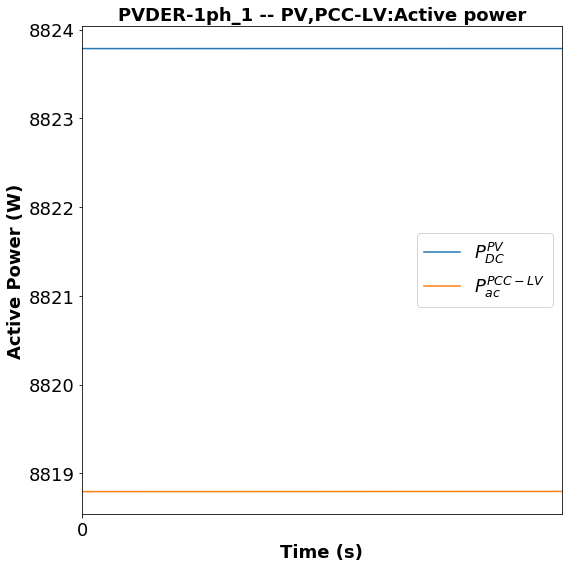

In [7]:
results1.PER_UNIT = False
results1.PLOT_TITLE = True
results1.font_size = 18
results1.plot_DER_simulation(plot_type='active_power_Ppv_Pac_PCC')#

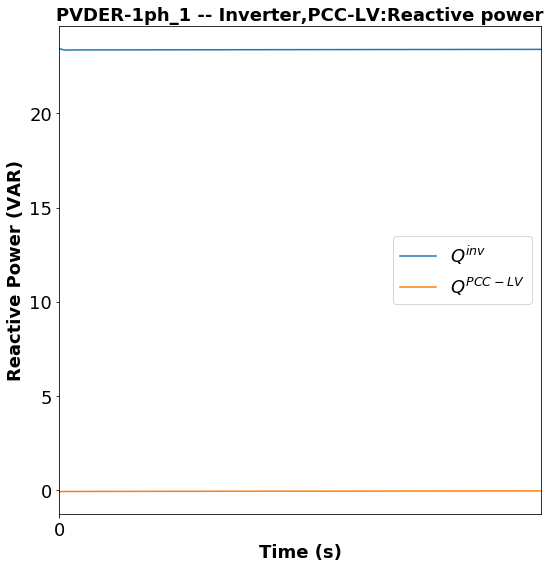

In [8]:
results1.plot_DER_simulation(plot_type='reactive_power')#_Q_PCC

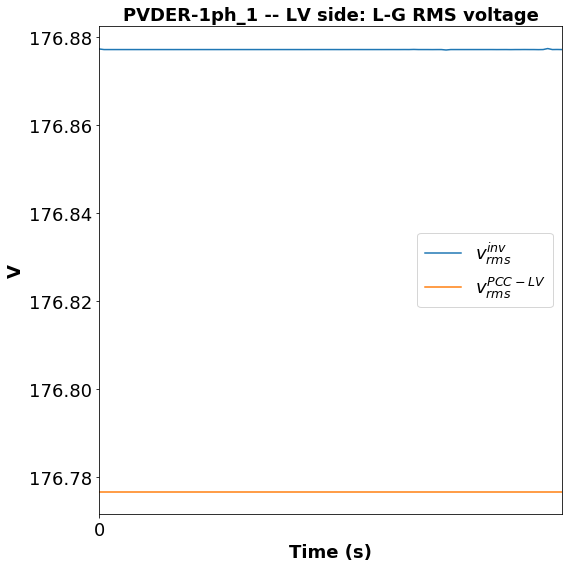

In [9]:
results1.plot_DER_simulation(plot_type='voltage_LV') #voltage_Vpcclv

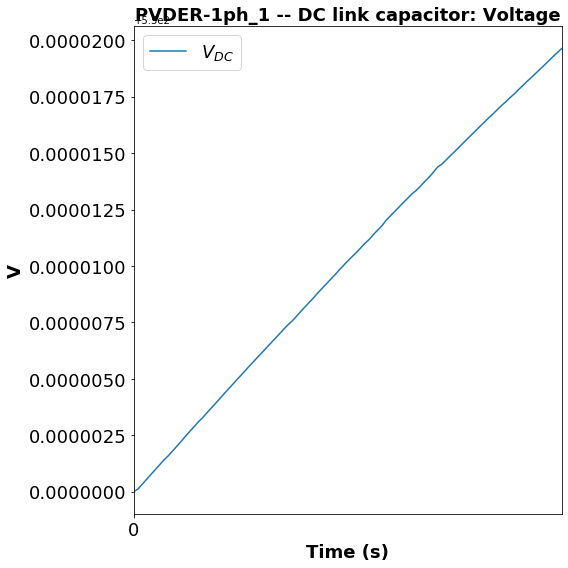

In [10]:
results1.plot_DER_simulation(plot_type='voltage_Vdc')

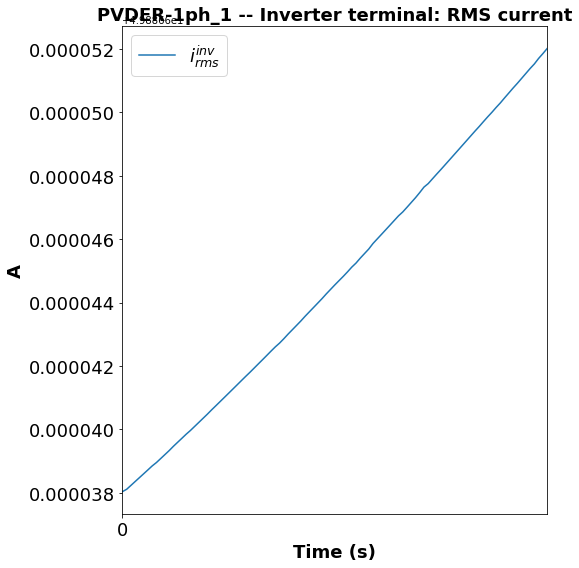

In [11]:
results1.plot_DER_simulation(plot_type='current')

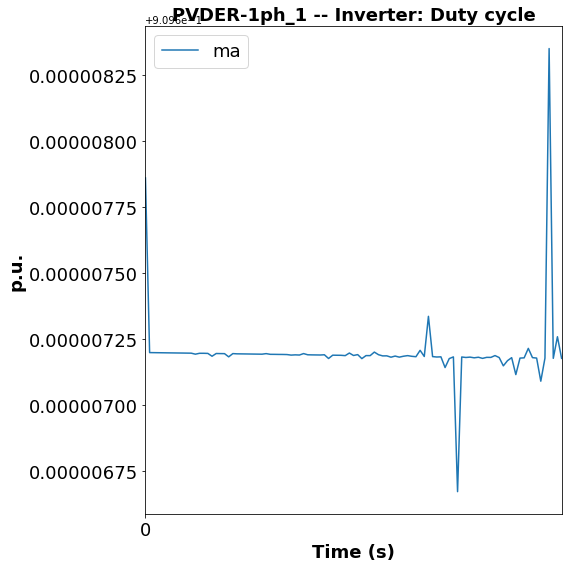

In [12]:
results1.plot_DER_simulation(plot_type='duty_cycle')

In [13]:
results1.plot_DER_simulation(plot_type='frequency')

ValueError: Frequency plot is only available if PV-DER model is stand alone!